In [1]:
import pandas as pd
from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
 
ms = DataReader('MS',  'yahoo', datetime(2019,1,1), datetime(2019,8,31))
returns = pd.DataFrame(np.diff(np.log(ms['Adj Close'].values)))
returns.index = ms.index.values[1:ms.index.values.shape[0]]
returns.columns = ['MS Returns']

spy = DataReader('SPY',  'yahoo', datetime(2019,1,1), datetime(2019,8,31))
returns1 = pd.DataFrame(np.diff(np.log(spy['Adj Close'].values)))
returns1.index = spy.index.values[1:spy.index.values.shape[0]]
returns1.columns = ['SPY Returns']

jpm = DataReader('JPM',  'yahoo', datetime(2019,1,1), datetime(2019,8,31))
returns2 = pd.DataFrame(np.diff(np.log(jpm['Adj Close'].values)))
returns2.index = jpm.index.values[1:jpm.index.values.shape[0]]
returns2.columns = ['JPM Returns']

bac = DataReader('BAC',  'yahoo', datetime(2019,1,1), datetime(2019,8,31))
returns3 = pd.DataFrame(np.diff(np.log(bac['Adj Close'].values)))
returns3.index = bac.index.values[1:bac.index.values.shape[0]]
returns3.columns = ['BAC Returns']

gs = DataReader('GS',  'yahoo', datetime(2019,1,1), datetime(2019,8,31))
returns4 = pd.DataFrame(np.diff(np.log(gs['Adj Close'].values)))
returns4.index = gs.index.values[1:gs.index.values.shape[0]]
returns4.columns = ['GS Returns']

In [2]:
ms1=ms[['Adj Close']]
spy1=spy[['Adj Close']]
jpm1=jpm[['Adj Close']]
bac1=bac[['Adj Close']]
gs1=gs[['Adj Close']]
spy1

,Adj Close
Date,
2018-12-31,241.805374
2019-01-02,242.056915
2019-01-03,236.280746
2019-01-04,244.195160
2019-01-07,246.120560
...,...
2019-08-26,281.237549
2019-08-27,280.134094
2019-08-28,282.106659


In [3]:
from functools import reduce
data_frames = [ms1, spy1,jpm1,bac1,gs1]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), data_frames)
df_merged.columns = ['MS', 'SPY','JPM','BAC','GS']
df_merged

,MS,SPY,JPM,BAC,GS
Date,,,,,
2018-12-31,37.405678,241.805374,91.347137,23.608894,160.697510
2019-01-02,38.113232,242.056915,92.928543,23.915503,165.488129
2019-01-03,37.433983,236.280746,91.607857,23.532244,163.063950
2019-01-04,38.962288,244.195160,94.985039,24.509558,168.393295
2019-01-07,39.349075,246.120560,95.051064,24.490395,169.326401
...,...,...,...,...,...
2019-08-26,38.696182,281.237549,102.305496,25.929707,193.702530
2019-08-27,38.339672,280.134094,101.223755,25.629547,192.169601
2019-08-28,38.908165,282.106659,102.238487,25.997484,194.449585


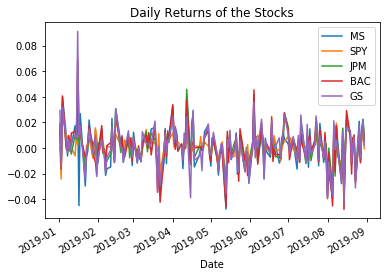

In [4]:
#ms1=ms[['Adj Close']]
rs = df_merged.apply(np.log).diff(1) 
rs.plot(title='Daily Returns of the Stocks')

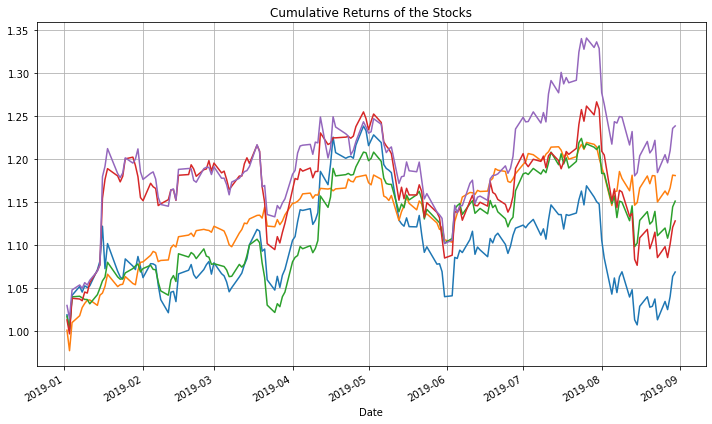

In [5]:
(rs.cumsum().apply(np.exp)).plot(legend=0, figsize=(10,6), grid=True, title='Cumulative Returns of the Stocks')
plt.tight_layout()

In [6]:
from sklearn.decomposition import PCA
pca = PCA(1).fit(rs.fillna(0))

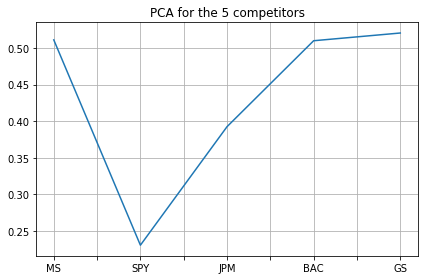

In [8]:
pc1 = pd.Series(index=rs.columns, data=pca.components_[0])
pc1.plot(grid=True, title='PCA for the 5 competitors')
plt.tight_layout()

In [9]:
pc1

MS     0.511267
SPY    0.230618
JPM    0.392609
BAC    0.510094
GS     0.520656
dtype: float64

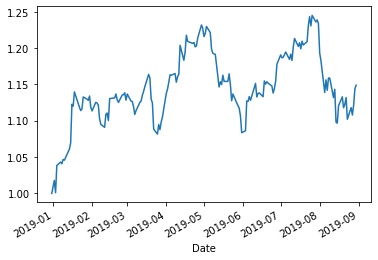

In [10]:
weights = abs(pc1)/sum(abs(pc1))
myrs = (weights*rs).sum(1)
myrs.cumsum().apply(np.exp).plot()

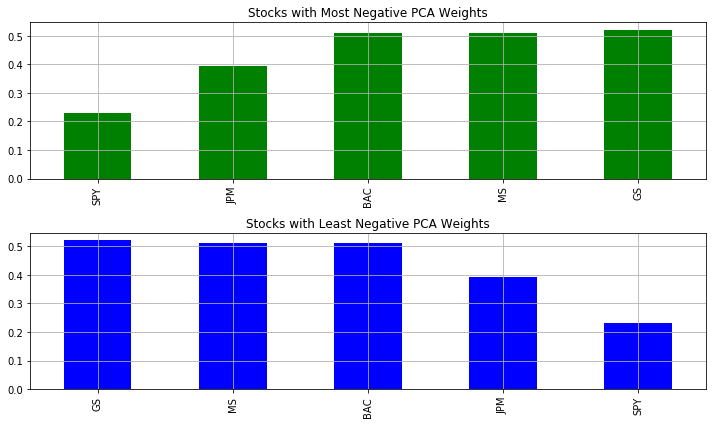

In [11]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
pc1.nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Stocks with Most Negative PCA Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks with Least Negative PCA Weights')

plt.tight_layout()